# Import libraries

In [1]:
'''Linear algebra'''
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

'''Data visualisation'''
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot # cf. 5.2
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime

# Load data

In [2]:
ytrain = pd.read_csv('../raw_data/ytrain_raw.csv')

/Users/nhuyghe/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1,3,5,11,20,49,52,54,55,56,64,70,71,94,95,101,102,114,129,131,132,133,138,139,152,157,163,174,180,184,193,196,201,207,208,219,220,228,241,245,250,256,258,264,265,269,270,271,272,273) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df_bornes = pd.read_csv('../raw_data/bornes.csv',sep=";")

In [4]:
df_info = pd.read_csv('../raw_data/info_static.csv')

In [5]:
df_info.head()

t_id s_id   latitude  longitude                 street   city  zipcode  \
0  S84-T1  S84  48.863766    2.41177  104 RUE LOUIS LUMIERE  Paris    75020   
1  S84-T3  S84  48.863766    2.41177  104 RUE LOUIS LUMIERE  Paris    75020   
2  S86-T1  S86  48.890610    2.35423         27 RUE ORDENER  Paris    75018   
3  S86-T2  S86  48.890610    2.35423         27 RUE ORDENER  Paris    75018   
4  S86-T3  S86  48.890610    2.35423         27 RUE ORDENER  Paris    75018   

                         model  
0  E/F, Combo, T2, CHAdeMO, T3  
1  CHAdeMO, T2, T3, E/F, Combo  
2  CHAdeMO, Combo, T2, T3, E/F  
3                          E/F  
4  T3, Combo, CHAdeMO, E/F, T2

In [6]:
xtrain = pd.read_csv('../raw_data/xtrain_raw.csv')
xtrain.head()

timestamp  temperature  wind_speed  wind_gust_speed  \
0  2019-11-25T00:00:00+00:00          8.7        11.0             24.0   
1  2019-11-25T01:00:00+00:00          8.8         9.0             20.0   
2  2019-11-25T02:00:00+00:00          8.9         8.0             18.0   
3  2019-11-25T03:00:00+00:00          8.8         7.0             18.0   
4  2019-11-25T04:00:00+00:00          8.8        10.0             23.0   

   rain_level traffic_state  average_flow  
0         0.0         Fluid         218.1  
1         0.0         Fluid         144.3  
2         0.0         Fluid         110.0  
3         0.0         Fluid         143.8  
4         0.0         Fluid         315.1

# Geolocalisation of EV stations in Paris

In [7]:
df_bornes_paris = df_bornes[df_bornes['code_insee'].str[:2] == '75']

In [8]:
df_bornes_paris['n_enseigne'].unique()

array(['Paris Recharge', "Belib'", 'Bornes sur candélabre'], dtype=object)

In [9]:
df_bornes_paris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1493 entries, 3826 to 5318
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   n_amenageur     1493 non-null   object 
 1   n_operateur     1493 non-null   object 
 2   n_enseigne      1493 non-null   object 
 3   id_station      1493 non-null   object 
 4   n_station       1493 non-null   object 
 5   ad_station      1493 non-null   object 
 6   code_insee      1493 non-null   object 
 7   Xlongitude      1493 non-null   object 
 8   Ylatitude       1493 non-null   object 
 9   nbre_pdc        1493 non-null   float64
 10  id_pdc          1493 non-null   object 
 11  puiss_max       1493 non-null   object 
 12  type_prise      1493 non-null   object 
 13  acces_recharge  1493 non-null   object 
 14  accessibilité   1493 non-null   object 
 15  observations    1493 non-null   object 
 16  date_maj        1493 non-null   object 
 17  source          1493 non-null 

In [10]:
float_cols = ['Xlongitude','Ylatitude']
for col in float_cols:
    df_bornes_paris[col] = df_bornes_paris[col].astype(float)

<ipython-input-10-a187a5a26bff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bornes_paris[col] = df_bornes_paris[col].astype(float)


In [12]:
df_tmp = df_bornes_paris.rename(columns={
    "Ylatitude":"Latitude",
    "Xlongitude":"Longitude",
    "n_enseigne":"Operator",
    "nbre_pdc":"Number of EV charging points",
    "ad_station":"Adresse"})
df_tmp.head()

n_amenageur      n_operateur        Operator       id_station  \
3826  Mairie de Paris  Mairie de Paris  Paris Recharge  FR*W75*PVP*0096   
3827  Mairie de Paris  Mairie de Paris  Paris Recharge  FR*W75*PVP*0169   
3828  Mairie de Paris  Mairie de Paris  Paris Recharge  FR*W75*PVP*0023   
3829  Mairie de Paris  Mairie de Paris  Paris Recharge  FR*W75*PVP*0044   
3830  Mairie de Paris           Izivia          Belib'  FR*V75*EBELI*78   

                    n_station                               Adresse  \
3826  2 RUE FABRE D'EGLANTINE  2 RUE FABRE D'EGLANTINE, 75012 PARIS   
3827           28 AVENUE NIEL           28 AVENUE NIEL, 75017 PARIS   
3828    133 RUE SAINT JACQUES    133 RUE SAINT JACQUES, 75005 PARIS   
3829       2 RUE DE MARTIGNAC       2 RUE DE MARTIGNAC, 75007 PARIS   
3830       15 BOULEVARD MURAT       15 BOULEVARD MURAT, 75016 PARIS   

     code_insee  Longitude   Latitude  Number of EV charging points  \
3826      75112   2.395374  48.845577                           5.0   
3827      75117   2.295628  48.881032                           5.0   
3828      75105   2.343399  48.846900                           6.0   
3829      75107   2.319539  48.859366                           6.0   
3830      75116   2.258213  48.846652                           3.0   

                    id_pdc puiss_max type_prise acces_recharge accessibilité  \
3826  FR*W75*EVP*0096*0003       3.7   prise T3         payant     7/7-24/24   
3827  FR*W75*EVP*0169*0001       3.7   prise T3         payant     7/7-24/24   
3828  FR*W75*EVP*0023*0003       3.7   prise T3         payant     7/7-24/24   
3829  FR*W75*EVP*0044*0004       3.7   prise T3         payant     7/7-24/24   
3830   FR*V75*EBELI*78*1*2       3.7  prise E/F         payant     7/7-24/24   

                                           observations    date_maj  \
3826  Courant: AC mono|tarif: 120€/an|https://www.pa...  2020/07/22   
3827  Courant: AC mono|tarif: 120€/an|https://www.pa...  2020/07/22   
3828  Courant: AC mono|tarif: 120€/an|https://www.pa...  2020/07/22   
3829  Courant: AC mono|tarif: 120€/an|https://www.pa...  2020/07/22   
3830  Courant: AC mono|tarif: 1€ la 1e heure puis 16...  2020/07/22   

                                                 source  
3826  https://www.data.gouv.fr/fr/datasets/bornes-de...  
3827  https://www.data.gouv.fr/fr/datasets/bornes-de...  
3828  https://www.data.gouv.fr/fr/datasets/bornes-de...  
3829  https://www.data.gouv.fr/fr/datasets/bornes-de...  
3830  https://www.data.gouv.fr/fr/datasets/bornes-de...

In [13]:
belib_color = px.colors.label_rgb((46,172,109))
paris_color = px.colors.label_rgb((209,209,209))
candel_color = px.colors.label_rgb((255,230,153))

color_discrete_map = {'Paris Recharge': paris_color, 
                      "Belib'": belib_color, 
                      "Bornes sur candélabre": candel_color}

px.set_mapbox_access_token(tmp)

fig = px.scatter_mapbox(data_frame=df_tmp, 
                        title="EV Charging Stations in Paris",
                        lat="Latitude", 
                        lon="Longitude", 
                        color="Operator", 
                        size="Number of EV charging points",
                        mapbox_style="carto-positron",
                        color_discrete_map=color_discrete_map,
                        size_max=8.5, 
                        zoom=11, 
                        hover_name="Adresse",
                        hover_data=["Operator","Number of EV charging points"],
                        opacity=0.75)
fig.update_layout(
        autosize=False,
        width=1000,
        height=700,
        margin=dict(
            l=50,
            r=50,
            b=100,
            t=100,
            pad=4))

fig.show()

# Cleaning

### y_train by station

In [14]:
dataset_cleaned = ytrain.fillna('Offline')
dataset_cleaned['timestamp'] = pd.to_datetime(dataset_cleaned['timestamp'])
dataset_cleaned = dataset_cleaned.set_index('timestamp')

In [15]:
for col in dataset_cleaned.columns:
    dataset_cleaned[col] = dataset_cleaned[col]\
    .map({'Available':1, 'Charging':0, 'Down':0, 'Offline':0, 'Passive':0})

In [16]:
# Rename columns
terminals_name = list(dataset_cleaned.columns)
stations_id = list(dataset_cleaned.columns.str[:-3])
cols_dict = {terminals_name[i]: stations_id[i] for i in range(len(terminals_name))}
df_stations = dataset_cleaned.rename(columns=cols_dict)

In [17]:
# Group columns by stations
df_stations = df_stations.groupby(level=0,axis=1).sum()
df_stations.head()

S1  S10  S11  S12  S13  S14  S15  S16  S17  S18  \
timestamp                                                                    
2019-11-25 00:00:00+00:00   3    0    0    0    2    0    3    0    3    1   
2019-11-25 00:15:00+00:00   3    0    0    1    2    0    3    0    3    2   
2019-11-25 00:30:00+00:00   3    0    0    1    2    0    3    0    3    2   
2019-11-25 00:45:00+00:00   3    0    0    0    2    0    3    0    3    2   
2019-11-25 01:00:00+00:00   3    0    0    0    2    0    3    0    3    2   

                           S19  S2  S20  S21  S22  S23  S24  S25  S26  S27  \
timestamp                                                                    
2019-11-25 00:00:00+00:00    3   0    0    2    0    0    3    0    0    2   
2019-11-25 00:15:00+00:00    3   0    0    2    0    0    3    0    0    2   
2019-11-25 00:30:00+00:00    3   0    0    2    0    0    3    0    0    2   
2019-11-25 00:45:00+00:00    3   0    0    2    0    0    3    0    0    2   
2019-11-25 01:00:00+00:00    3   0    0    2    0    0    3    0    0    1   

                           S28  S29  S3  S30  S31  S32  S33  S34  S35  S36  \
timestamp                                                                    
2019-11-25 00:00:00+00:00    3    3   1    1    0    0    3    0    1    2   
2019-11-25 00:15:00+00:00    3    3   1    1    0    0    3    0    1    2   
2019-11-25 00:30:00+00:00    3    3   1    1    0    0    3    0    1    2   
2019-11-25 00:45:00+00:00    3    3   1    1    0    0    3    0    1    2   
2019-11-25 01:00:00+00:00    3    3   1    1    0    0    3    0    1    2   

                           S37  S38  S39  S4  S41  S42  S45  S46  S47  S48  \
timestamp                                                                    
2019-11-25 00:00:00+00:00    2    3    2   2    0    2    2    0    0    3   
2019-11-25 00:15:00+00:00    2    3    2   2    0    2    2    0    0    3   
2019-11-25 00:30:00+00:00    2    3    2   2    0    0    2    0    0    3   
2019-11-25 00:45:00+00:00    2    3    1   2    0    0    2    0    0    3   
2019-11-25 01:00:00+00:00    2    3    1   2    0    0    2    0    0    3   

                           S49  S5  S50  S51  S52  S53  S56  S57  S58  S59  \
timestamp                                                                    
2019-11-25 00:00:00+00:00    0   0    2    2    0    0    0    1    3    1   
2019-11-25 00:15:00+00:00    0   0    2    3    0    0    0    1    3    2   
2019-11-25 00:30:00+00:00    0   0    2    3    0    0    0    1    3    2   
2019-11-25 00:45:00+00:00    0   0    2    0    0    0    0    2    3    2   
2019-11-25 01:00:00+00:00    0   0    1    3    0    0    0    2    3    2   

                           S6  S60  S62  S63  S64  S65  S66  S67  S68  S69  \
timestamp                                                                    
2019-11-25 00:00:00+00:00   0    2    0    1    3    0    2    0    0    3   
2019-11-25 00:15:00+00:00   0    2    0    1    3    0    2    0    0    2   
2019-11-25 00:30:00+00:00   0    2    0    2    3    0    2    0    0    2   
2019-11-25 00:45:00+00:00   0    2    0    2    3    0    2    0    0    3   
2019-11-25 01:00:00+00:00   0    2    0    2    3    0    2    0    0    3   

                           S7  S70  S71  S72  S74  S75  S76  S77  S78  S79  \
timestamp                                                                    
2019-11-25 00:00:00+00:00   0    2    2    2    2    0    2    2    1    2   
2019-11-25 00:15:00+00:00   0    2    2    2    2    0    2    1    1    3   
2019-11-25 00:30:00+00:00   0    3    2    2    2    0    2    1    2    3   
2019-11-25 00:45:00+00:00   0    3    2    2    2    0    2    1    2    3   
2019-11-25 01:00:00+00:00   0    0    2    2    2    0    2    1    2    3   

                           S8  S80  S81  S82  S83  S84  S85  S86  S87  S88  \
timestamp                                                                    
2019-11-25 00:00:00+00:00   0    1    1   

In [18]:
df_stations_unpivot = df_stations.melt(ignore_index=False).rename(columns={'variable':'s_id','value':'nb_available'}).reset_index()
df_stations_unpivot.head()

timestamp s_id  nb_available
0 2019-11-25 00:00:00+00:00   S1             3
1 2019-11-25 00:15:00+00:00   S1             3
2 2019-11-25 00:30:00+00:00   S1             3
3 2019-11-25 00:45:00+00:00   S1             3
4 2019-11-25 01:00:00+00:00   S1             3

In [19]:
df_all = df_stations_unpivot.groupby('timestamp').sum().reset_index()
df_all.head()

timestamp  nb_available
0 2019-11-25 00:00:00+00:00           122
1 2019-11-25 00:15:00+00:00           126
2 2019-11-25 00:30:00+00:00           127
3 2019-11-25 00:45:00+00:00           123
4 2019-11-25 01:00:00+00:00           119

### y_train by terminal type

In [20]:
# Rename columns
terminals_name = list(dataset_cleaned.columns)
terminals_id = list(dataset_cleaned.columns.str[-2:])
terminals_dict = {terminals_name[i]: terminals_id[i] for i in range(len(terminals_name))}
df_terminals = dataset_cleaned.rename(columns=terminals_dict)

In [21]:
df_terminals = df_terminals.groupby(level=0,axis=1).sum()
df_terminals.head()

T1  T2  T3
timestamp                            
2019-11-25 00:00:00+00:00  45  34  43
2019-11-25 00:15:00+00:00  47  35  44
2019-11-25 00:30:00+00:00  46  35  46
2019-11-25 00:45:00+00:00  44  34  45
2019-11-25 01:00:00+00:00  43  34  42

In [22]:
df_terminals_unpivot = df_terminals.melt(ignore_index=False).rename(columns={'variable':'terminal_id','value':'nb_available'}).reset_index()
df_terminals_unpivot.head()

timestamp terminal_id  nb_available
0 2019-11-25 00:00:00+00:00          T1            45
1 2019-11-25 00:15:00+00:00          T1            47
2 2019-11-25 00:30:00+00:00          T1            46
3 2019-11-25 00:45:00+00:00          T1            44
4 2019-11-25 01:00:00+00:00          T1            43

### X_train

In [23]:
X_cleaned = xtrain.fillna(method='ffill')
X_cleaned['timestamp'] = pd.to_datetime(X_cleaned['timestamp'])
X_cleaned = X_cleaned.set_index('timestamp')\
                .resample('15Min').first()\
                .fillna(method='ffill')\
                .reset_index()
X_cleaned.head()

timestamp  temperature  wind_speed  wind_gust_speed  \
0 2019-11-25 00:00:00+00:00          8.7        11.0             24.0   
1 2019-11-25 00:15:00+00:00          8.7        11.0             24.0   
2 2019-11-25 00:30:00+00:00          8.7        11.0             24.0   
3 2019-11-25 00:45:00+00:00          8.7        11.0             24.0   
4 2019-11-25 01:00:00+00:00          8.8         9.0             20.0   

   rain_level traffic_state  average_flow  
0         0.0         Fluid         218.1  
1         0.0         Fluid         218.1  
2         0.0         Fluid         218.1  
3         0.0         Fluid         218.1  
4         0.0         Fluid         144.3

# Evolution

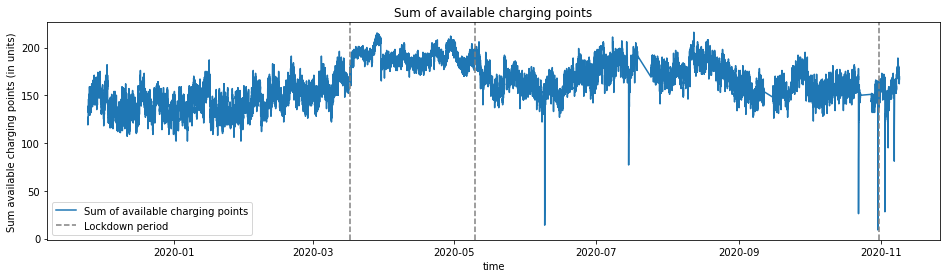

In [24]:
plt.figure(figsize=(16,4))
plt.plot(df_all['timestamp'],df_all['nb_available'],label='Sum of available charging points')
plt.axvline(datetime(2020,3,17),linestyle='--',color='grey',label='Lockdown period')
plt.axvline(datetime(2020,5,10),linestyle='--',color='grey')
plt.axvline(datetime(2020,10,31),linestyle='--',color='grey')
plt.xlabel('time')
plt.ylabel('Sum available charging points (in units)')
plt.title('Sum of available charging points')
plt.legend()
plt.show()

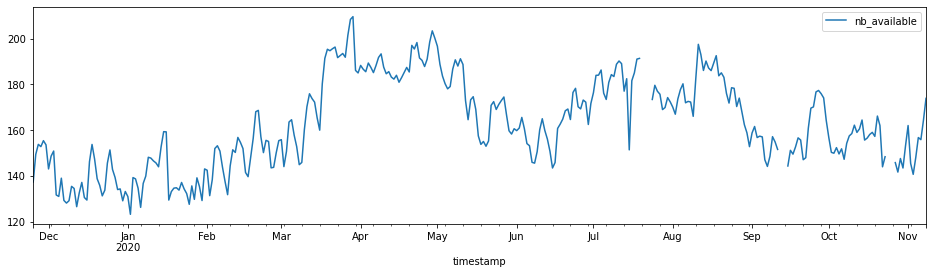

In [25]:
df_all.set_index('timestamp').resample('D',level=0).mean().plot(figsize=(16,4))
plt.show()

In [26]:
# Define average
df_all_day = df_all.set_index('timestamp').resample('D',level=0).mean().reset_index()
df_all_day.head()

timestamp  nb_available
0 2019-11-25 00:00:00+00:00    137.291667
1 2019-11-26 00:00:00+00:00    149.364583
2 2019-11-27 00:00:00+00:00    153.750000
3 2019-11-28 00:00:00+00:00    152.770833
4 2019-11-29 00:00:00+00:00    155.364583

In [27]:
df_all_rolling = df_all.set_index('timestamp').resample('D',level=0).mean().rolling(7).mean().reset_index()
df_all_rolling.tail()

timestamp  nb_available
345 2020-11-04 00:00:00+00:00    148.602607
346 2020-11-05 00:00:00+00:00    149.911982
347 2020-11-06 00:00:00+00:00    151.679541
348 2020-11-07 00:00:00+00:00    153.267104
349 2020-11-08 00:00:00+00:00    154.962723

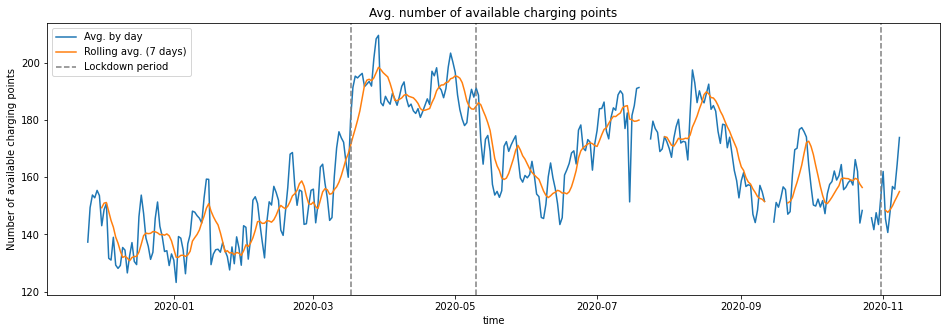

In [72]:
plt.figure(figsize=(16,5))
plt.plot(df_all_day['timestamp'],df_all_day['nb_available'],label='Avg. by day')
plt.plot(df_all_rolling['timestamp'],df_all_rolling['nb_available'],label='Rolling avg. (7 days)')
plt.axvline(datetime(2020,3,17),linestyle='--',color='grey',label='Lockdown period')
plt.axvline(datetime(2020,5,10),linestyle='--',color='grey')
plt.axvline(datetime(2020,10,31),linestyle='--',color='grey')
plt.xlabel('time')
plt.ylabel('Number of available charging points')
plt.title('Avg. number of available charging points')
plt.legend()
plt.show()

# Seasonality

## Seasonality (All)

In [29]:
# Add weekday and hours columns
df_all['weekday'] = df_all['timestamp'].dt.weekday
df_all['hour'] = df_all['timestamp'].dt.hour
df_all.head()

timestamp  nb_available  weekday  hour
0 2019-11-25 00:00:00+00:00           122        0     0
1 2019-11-25 00:15:00+00:00           126        0     0
2 2019-11-25 00:30:00+00:00           127        0     0
3 2019-11-25 00:45:00+00:00           123        0     0
4 2019-11-25 01:00:00+00:00           119        0     1

### By weekday

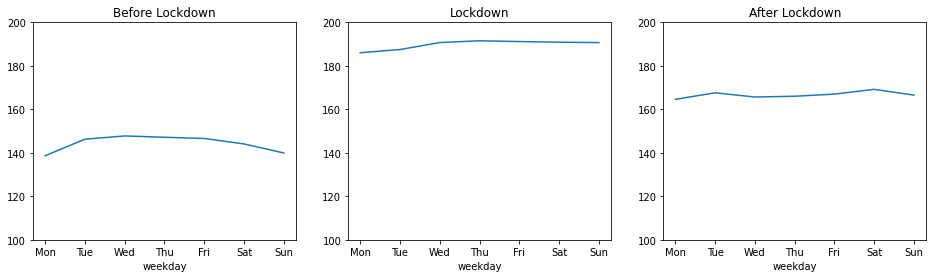

In [30]:
fig = plt.figure(figsize=(16,4))

ax1 = fig.add_subplot(131)
df_all[df_all['timestamp']<'2020-03-17'].groupby('weekday').mean()['nb_available'].plot()
plt.title('Before Lockdown')
plt.xticks(np.arange(7),labels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.ylim(100,200)

ax2 = fig.add_subplot(132)
df_all[('2020-03-17'< df_all['timestamp'])&(df_all['timestamp'] <'2020-05-10')]\
    .groupby('weekday').mean()['nb_available'].plot()
plt.title('Lockdown')
plt.xticks(np.arange(7),labels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.ylim(100,200)

ax3 = fig.add_subplot(133)
df_all[('2020-05-10'< df_all['timestamp'])&(df_all['timestamp'] <'2020-10-31')]\
    .groupby('weekday').mean()['nb_available'].plot()
plt.title('After Lockdown')
plt.xticks(np.arange(7),labels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.ylim(100,200)

plt.show()

### By hour

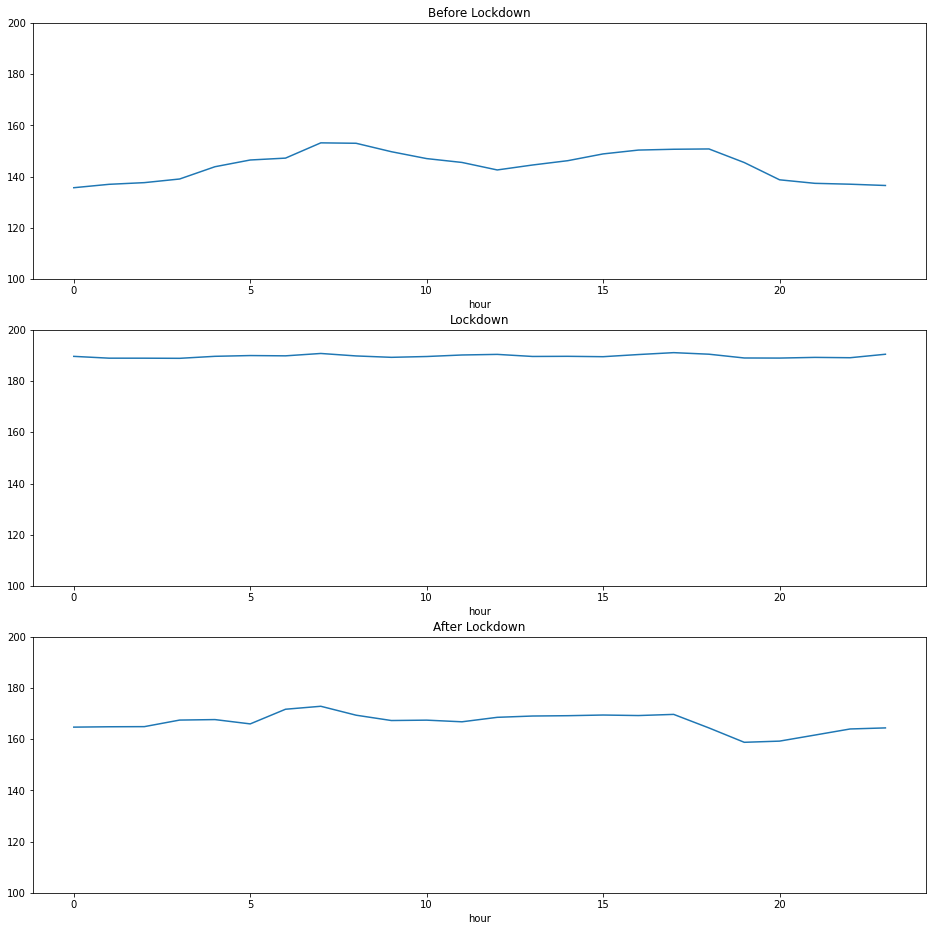

In [31]:
fig = plt.figure(figsize=(16,16))

ax1 = fig.add_subplot(311)
df_all[df_all['timestamp']<'2020-03-17'].groupby('hour').mean()['nb_available'].plot()
plt.title('Before Lockdown')
plt.ylim(100,200)

ax2 = fig.add_subplot(312)
df_all[('2020-03-17'< df_all['timestamp'])&(df_all['timestamp'] <'2020-05-10')]\
    .groupby('hour').mean()['nb_available'].plot()
plt.title('Lockdown')
plt.ylim(100,200)

ax3 = fig.add_subplot(313)
df_all[('2020-05-10'< df_all['timestamp'])&(df_all['timestamp'] <'2020-10-31')]\
    .groupby('hour').mean()['nb_available'].plot()
plt.title('After Lockdown')
plt.ylim(100,200)

plt.show()

## Seasonality (Terminals)

In [32]:
# Add weekday and hours columns
df_terminals_unpivot['weekday'] = df_terminals_unpivot['timestamp'].dt.weekday
df_terminals_unpivot['hour'] = df_terminals_unpivot['timestamp'].dt.hour
df_terminals_unpivot.head()

timestamp terminal_id  nb_available  weekday  hour
0 2019-11-25 00:00:00+00:00          T1            45        0     0
1 2019-11-25 00:15:00+00:00          T1            47        0     0
2 2019-11-25 00:30:00+00:00          T1            46        0     0
3 2019-11-25 00:45:00+00:00          T1            44        0     0
4 2019-11-25 01:00:00+00:00          T1            43        0     1

In [33]:
df_terminals_unpivot_bef = df_terminals_unpivot[df_terminals_unpivot['timestamp']<'2020-03-17']
df_terminals_unpivot_lock = df_terminals_unpivot[(df_terminals_unpivot['timestamp']>='2020-03-17')&(df_terminals_unpivot['timestamp']<'2020-05-10')]
df_terminals_unpivot_after = df_terminals_unpivot[(df_terminals_unpivot['timestamp']>='2020-05-10')&(df_terminals_unpivot['timestamp']<'2020-10-31')]

### By hour

In [34]:
df_hour_T1 = df_terminals_unpivot[df_terminals_unpivot['terminal_id']=='T1'].groupby(['hour']).mean()[['nb_available']]
df_hour_T2 = df_terminals_unpivot[df_terminals_unpivot['terminal_id']=='T2'].groupby(['hour']).mean()[['nb_available']]
df_hour_T3 = df_terminals_unpivot[df_terminals_unpivot['terminal_id']=='T3'].groupby(['hour']).mean()[['nb_available']]

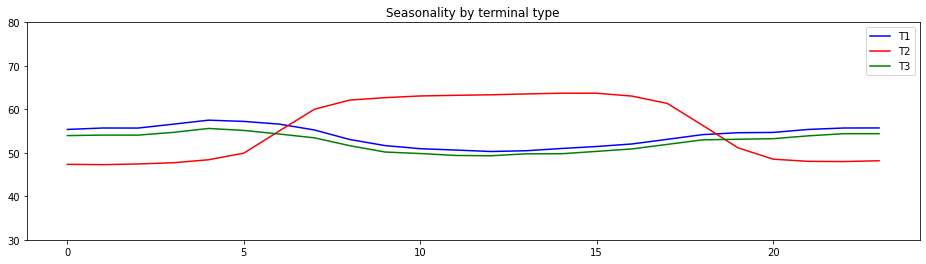

In [35]:
fig = plt.figure(figsize=(16,4))
plt.plot(df_hour_T1, color='b', label='T1')
plt.plot(df_hour_T2, color='r', label='T2')
plt.plot(df_hour_T3, color='g', label='T3')
plt.legend()
plt.ylim(30,80)
plt.title('Seasonality by terminal type')
plt.show()

In [36]:
df_hour_T1_bef = df_terminals_unpivot_bef[df_terminals_unpivot_bef['terminal_id']=='T1'].groupby(['hour']).mean()[['nb_available']]
df_hour_T2_bef = df_terminals_unpivot_bef[df_terminals_unpivot_bef['terminal_id']=='T2'].groupby(['hour']).mean()[['nb_available']]
df_hour_T3_bef = df_terminals_unpivot_bef[df_terminals_unpivot_bef['terminal_id']=='T3'].groupby(['hour']).mean()[['nb_available']]

In [37]:
df_hour_T1_lock = df_terminals_unpivot_lock[df_terminals_unpivot_lock['terminal_id']=='T1'].groupby(['hour']).mean()[['nb_available']]
df_hour_T2_lock = df_terminals_unpivot_lock[df_terminals_unpivot_lock['terminal_id']=='T2'].groupby(['hour']).mean()[['nb_available']]
df_hour_T3_lock = df_terminals_unpivot_lock[df_terminals_unpivot_lock['terminal_id']=='T3'].groupby(['hour']).mean()[['nb_available']]

In [38]:
df_hour_T1_after = df_terminals_unpivot_after[df_terminals_unpivot_after['terminal_id']=='T1'].groupby(['hour']).mean()[['nb_available']]
df_hour_T2_after = df_terminals_unpivot_after[df_terminals_unpivot_after['terminal_id']=='T2'].groupby(['hour']).mean()[['nb_available']]
df_hour_T3_after = df_terminals_unpivot_after[df_terminals_unpivot_after['terminal_id']=='T3'].groupby(['hour']).mean()[['nb_available']]

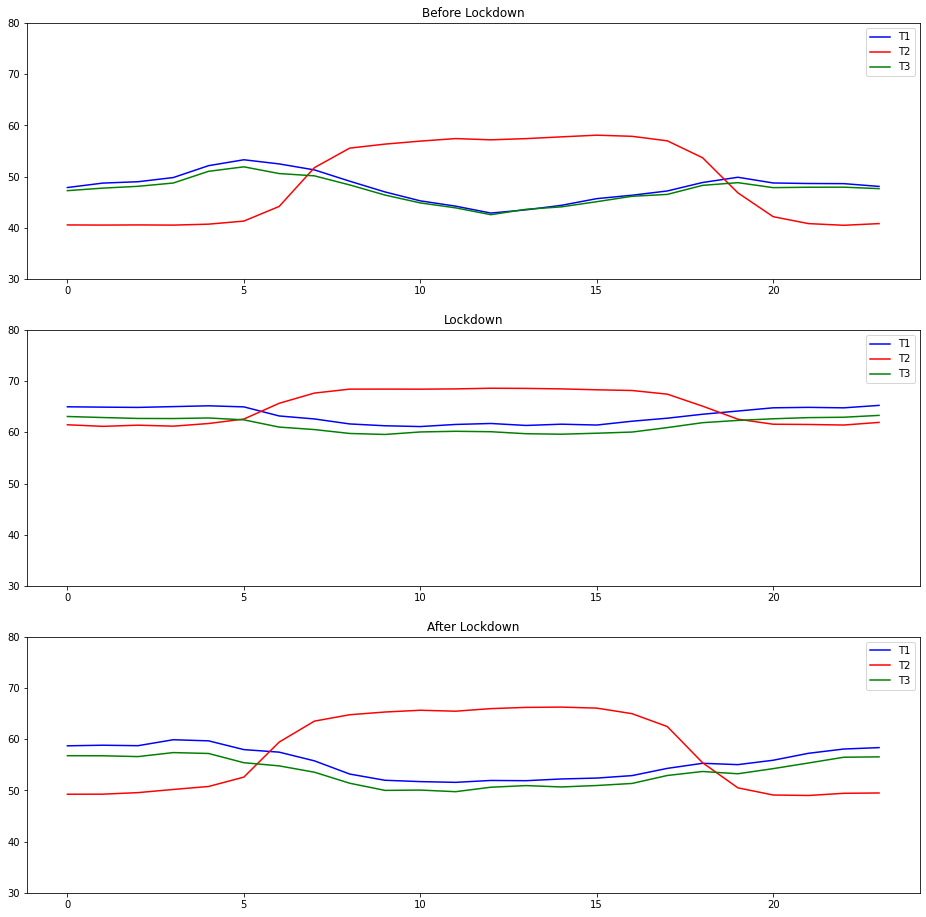

In [39]:


fig = plt.figure(figsize=(16,16))

ax1 = fig.add_subplot(311)
plt.plot(df_hour_T1_bef, color='b', label='T1')
plt.plot(df_hour_T2_bef, color='r', label='T2')
plt.plot(df_hour_T3_bef, color='g', label='T3')
plt.title('Before Lockdown')
plt.legend()
plt.ylim(30,80)

ax2 = fig.add_subplot(312)
plt.plot(df_hour_T1_lock, color='b', label='T1')
plt.plot(df_hour_T2_lock, color='r', label='T2')
plt.plot(df_hour_T3_lock, color='g', label='T3')
plt.title('Lockdown')
plt.legend()
plt.ylim(30,80)

ax3 = fig.add_subplot(313)
plt.plot(df_hour_T1_after, color='b', label='T1')
plt.plot(df_hour_T2_after, color='r', label='T2')
plt.plot(df_hour_T3_after, color='g', label='T3')
plt.title('After Lockdown')
plt.legend()
plt.ylim(30,80)

plt.show()

### By weekday

In [40]:
df_weekday_T1 = df_terminals_unpivot[df_terminals_unpivot['terminal_id']=='T1'].groupby(['weekday']).mean()[['nb_available']]
df_weekday_T2 = df_terminals_unpivot[df_terminals_unpivot['terminal_id']=='T2'].groupby(['weekday']).mean()[['nb_available']]
df_weekday_T3 = df_terminals_unpivot[df_terminals_unpivot['terminal_id']=='T3'].groupby(['weekday']).mean()[['nb_available']]

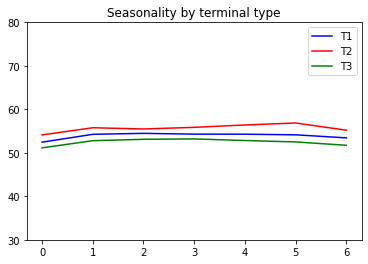

In [41]:
fig = plt.figure(figsize=(6,4))
plt.plot(df_weekday_T1, color='b', label='T1')
plt.plot(df_weekday_T2, color='r', label='T2')
plt.plot(df_weekday_T3, color='g', label='T3')
plt.legend()
plt.title('Seasonality by terminal type')
plt.ylim(30,80)
plt.show()

In [42]:
df_weekday_T1_bef = df_terminals_unpivot_bef[df_terminals_unpivot_bef['terminal_id']=='T1'].groupby(['weekday']).mean()[['nb_available']]
df_weekday_T2_bef = df_terminals_unpivot_bef[df_terminals_unpivot_bef['terminal_id']=='T2'].groupby(['weekday']).mean()[['nb_available']]
df_weekday_T3_bef = df_terminals_unpivot_bef[df_terminals_unpivot_bef['terminal_id']=='T3'].groupby(['weekday']).mean()[['nb_available']]

In [43]:
df_weekday_T1_lock = df_terminals_unpivot_lock[df_terminals_unpivot_lock['terminal_id']=='T1'].groupby(['weekday']).mean()[['nb_available']]
df_weekday_T2_lock = df_terminals_unpivot_lock[df_terminals_unpivot_lock['terminal_id']=='T2'].groupby(['weekday']).mean()[['nb_available']]
df_weekday_T3_lock = df_terminals_unpivot_lock[df_terminals_unpivot_lock['terminal_id']=='T3'].groupby(['weekday']).mean()[['nb_available']]

In [44]:
df_weekday_T1_after = df_terminals_unpivot_after[df_terminals_unpivot_after['terminal_id']=='T1'].groupby(['weekday']).mean()[['nb_available']]
df_weekday_T2_after = df_terminals_unpivot_after[df_terminals_unpivot_after['terminal_id']=='T2'].groupby(['weekday']).mean()[['nb_available']]
df_weekday_T3_after = df_terminals_unpivot_after[df_terminals_unpivot_after['terminal_id']=='T3'].groupby(['weekday']).mean()[['nb_available']]

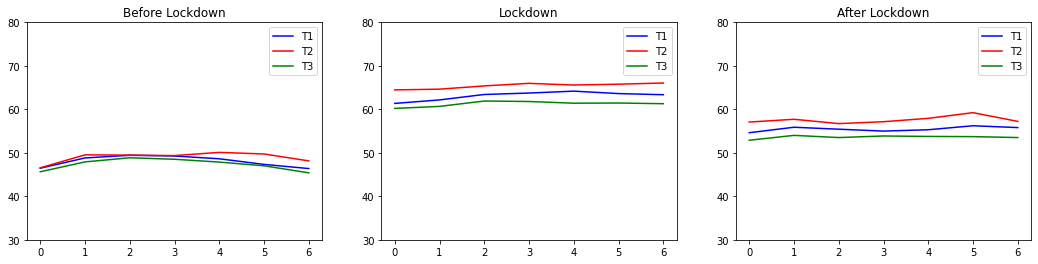

In [45]:


fig = plt.figure(figsize=(18,4))

ax1 = fig.add_subplot(131)
plt.plot(df_weekday_T1_bef, color='b', label='T1')
plt.plot(df_weekday_T2_bef, color='r', label='T2')
plt.plot(df_weekday_T3_bef, color='g', label='T3')
plt.title('Before Lockdown')
plt.legend()
plt.ylim(30,80)

ax2 = fig.add_subplot(132)
plt.plot(df_weekday_T1_lock, color='b', label='T1')
plt.plot(df_weekday_T2_lock, color='r', label='T2')
plt.plot(df_weekday_T3_lock, color='g', label='T3')
plt.title('Lockdown')
plt.legend()
plt.ylim(30,80)

ax3 = fig.add_subplot(133)
plt.plot(df_weekday_T1_after, color='b', label='T1')
plt.plot(df_weekday_T2_after, color='r', label='T2')
plt.plot(df_weekday_T3_after, color='g', label='T3')
plt.title('After Lockdown')
plt.legend()
plt.ylim(30,80)

plt.show()

# Animate map

In [46]:
df_unpivot = dataset_cleaned.melt(ignore_index=False).rename(columns={'variable':'t_id','value':'nb_available'}).reset_index()
df_unpivot.head()

timestamp   t_id  nb_available
0 2019-11-25 00:00:00+00:00  S7-T1             0
1 2019-11-25 00:15:00+00:00  S7-T1             0
2 2019-11-25 00:30:00+00:00  S7-T1             0
3 2019-11-25 00:45:00+00:00  S7-T1             0
4 2019-11-25 01:00:00+00:00  S7-T1             0

In [47]:
df_unpivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8526336 entries, 0 to 8526335
Data columns (total 3 columns):
 #   Column        Dtype              
---  ------        -----              
 0   timestamp     datetime64[ns, UTC]
 1   t_id          object             
 2   nb_available  int64              
dtypes: datetime64[ns, UTC](1), int64(1), object(1)
memory usage: 195.2+ MB


In [48]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   t_id       273 non-null    object 
 1   s_id       273 non-null    object 
 2   latitude   273 non-null    float64
 3   longitude  273 non-null    float64
 4   street     273 non-null    object 
 5   city       273 non-null    object 
 6   zipcode    273 non-null    int64  
 7   model      273 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 17.2+ KB


In [49]:
df_merged = df_unpivot.merge(df_info, on='t_id')
df_merged['hour'] = df_merged['timestamp'].dt.hour
df_merged['weekday'] = df_merged['timestamp'].dt.weekday
df_merged['t_type'] = df_merged['t_id'].str[-2:]
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8526336 entries, 0 to 8526335
Data columns (total 13 columns):
 #   Column        Dtype              
---  ------        -----              
 0   timestamp     datetime64[ns, UTC]
 1   t_id          object             
 2   nb_available  int64              
 3   s_id          object             
 4   latitude      float64            
 5   longitude     float64            
 6   street        object             
 7   city          object             
 8   zipcode       int64              
 9   model         object             
 10  hour          int64              
 11  weekday       int64              
 12  t_type        object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(4), object(6)
memory usage: 910.7+ MB


## Terminal T2 (normal)

In [50]:
df_merged_normal = df_merged[df_merged['t_type']=='T2'].reset_index(drop=True)
df_merged_normal.head()

timestamp   t_id  nb_available s_id   latitude  longitude  \
0 2019-11-25 00:00:00+00:00  S6-T2             0   S6  48.882794   2.382705   
1 2019-11-25 00:15:00+00:00  S6-T2             0   S6  48.882794   2.382705   
2 2019-11-25 00:30:00+00:00  S6-T2             0   S6  48.882794   2.382705   
3 2019-11-25 00:45:00+00:00  S6-T2             0   S6  48.882794   2.382705   
4 2019-11-25 01:00:00+00:00  S6-T2             0   S6  48.882794   2.382705   

                  street   city  zipcode model  hour  weekday t_type  
0  4 PLACE ARMAND CARREL  Paris    75019   E/F     0        0     T2  
1  4 PLACE ARMAND CARREL  Paris    75019   E/F     0        0     T2  
2  4 PLACE ARMAND CARREL  Paris    75019   E/F     0        0     T2  
3  4 PLACE ARMAND CARREL  Paris    75019   E/F     0        0     T2  
4  4 PLACE ARMAND CARREL  Paris    75019   E/F     1        0     T2

In [51]:
df_merged_normal_hour_mean = df_merged_normal.groupby(['s_id','hour']).agg({
    'latitude':'first',
    'longitude':'first',
    'street':'first',
    'zipcode':'first',
    'model':'first',
    'nb_available':'mean',
}).reset_index()
df_merged_normal_hour_mean.head()

s_id  hour   latitude  longitude                 street  zipcode model  \
0   S1     0  48.855667   2.354089  4 PLACE SAINT GERVAIS    75004   E/F   
1   S1     1  48.855667   2.354089  4 PLACE SAINT GERVAIS    75004   E/F   
2   S1     2  48.855667   2.354089  4 PLACE SAINT GERVAIS    75004   E/F   
3   S1     3  48.855667   2.354089  4 PLACE SAINT GERVAIS    75004   E/F   
4   S1     4  48.855667   2.354089  4 PLACE SAINT GERVAIS    75004   E/F   

   nb_available  
0      0.849881  
1      0.882068  
2      0.886900  
3      0.892974  
4      0.902087

In [52]:
px.set_mapbox_access_token(tmp)

green_=px.colors.label_rgb((46,172,109))
red_=px.colors.label_rgb((255,99,71))

fig = px.scatter_mapbox(data_frame=df_merged_normal_hour_mean, 
                        title="EV Charging Stations in Paris (Belib only)",
                        lat="latitude", 
                        lon="longitude", 
                        size="nb_available",
                        color="nb_available",
                        animation_frame="hour",
                        mapbox_style="carto-positron",
                        color_continuous_scale=[red_,green_],
                        size_max=20, 
                        zoom=11, 
                        opacity=0.8)

fig.update_layout(
        autosize=False,
        width=700,
        height=700,
        margin=dict(
            l=50,
            r=50,
            b=100,
            t=100,
            pad=10))

fig.show()

In [53]:
df_merged_normal_bef = df_merged_normal[df_merged_normal['timestamp']<'2020-03-17']
df_merged_normal_lock = df_merged_normal[(df_merged_normal['timestamp']>='2020-03-17')&(df_merged_normal['timestamp']<'2020-05-10')]
df_merged_normal_after = df_merged_normal[(df_merged_normal['timestamp']>='2020-05-10')&(df_merged_normal['timestamp']<'2020-10-31')] 

In [54]:
df_merged_normal_bef_hour_mean = df_merged_normal_bef.groupby(['s_id','hour']).agg({
    'latitude':'first',
    'longitude':'first',
    'street':'first',
    'zipcode':'first',
    'model':'first',
    'nb_available':'mean',
}).reset_index()
df_merged_normal_hour_mean.head()

s_id  hour   latitude  longitude                 street  zipcode model  \
0   S1     0  48.855667   2.354089  4 PLACE SAINT GERVAIS    75004   E/F   
1   S1     1  48.855667   2.354089  4 PLACE SAINT GERVAIS    75004   E/F   
2   S1     2  48.855667   2.354089  4 PLACE SAINT GERVAIS    75004   E/F   
3   S1     3  48.855667   2.354089  4 PLACE SAINT GERVAIS    75004   E/F   
4   S1     4  48.855667   2.354089  4 PLACE SAINT GERVAIS    75004   E/F   

   nb_available  
0      0.849881  
1      0.882068  
2      0.886900  
3      0.892974  
4      0.902087

In [55]:
px.set_mapbox_access_token(tmp)

green_=px.colors.label_rgb((46,172,109))
red_=px.colors.label_rgb((255,99,71))

fig = px.scatter_mapbox(data_frame=df_merged_normal_bef_hour_mean, 
                        title="EV Charging Stations in Paris before lockdown (Belib only)",
                        lat="latitude", 
                        lon="longitude", 
                        size="nb_available",
                        color="nb_available",
                        animation_frame="hour",
                        mapbox_style="carto-positron",
                        color_continuous_scale=[red_,green_],
                        size_max=20, 
                        zoom=11, 
                        opacity=0.8)

fig.update_layout(
        autosize=False,
        width=700,
        height=700,
        margin=dict(
            l=50,
            r=50,
            b=100,
            t=100,
            pad=4))

fig.show()

## Terminals T1 & T3 (fast charging)

In [56]:
df_merged_fast = df_merged[df_merged['t_type']!='T2'].reset_index(drop=True)
df_merged_fast = df_merged_fast.groupby(['timestamp','s_id']).agg({
    'nb_available':'sum',
    'latitude':'first',
    'longitude':'first',
    'street':'first',
    'city':'first',
    'zipcode':'first',
    'model':'first'
}).reset_index()
df_merged_fast['hour'] = df_merged_fast['timestamp'].dt.hour
df_merged_fast['weekday'] = df_merged_fast['timestamp'].dt.weekday
df_merged_fast.sort_values(['s_id','timestamp'])

timestamp s_id  nb_available   latitude  longitude  \
0       2019-11-25 00:00:00+00:00   S1             2  48.855667   2.354089   
91      2019-11-25 00:15:00+00:00   S1             2  48.855667   2.354089   
182     2019-11-25 00:30:00+00:00   S1             2  48.855667   2.354089   
273     2019-11-25 00:45:00+00:00   S1             2  48.855667   2.354089   
364     2019-11-25 01:00:00+00:00   S1             2  48.855667   2.354089   
...                           ...  ...           ...        ...        ...   
2841747 2020-11-08 22:45:00+00:00  S99             2  48.877800   2.391820   
2841838 2020-11-08 23:00:00+00:00  S99             2  48.877800   2.391820   
2841929 2020-11-08 23:15:00+00:00  S99             2  48.877800   2.391820   
2842020 2020-11-08 23:30:00+00:00  S99             2  48.877800   2.391820   
2842111 2020-11-08 23:45:00+00:00  S99             2  48.877800   2.391820   

                        street   city  zipcode                        model  \
0        4 PLACE SAINT GERVAIS  Paris    75004  E/F, CHAdeMO, T2, T3, Combo   
91       4 PLACE SAINT GERVAIS  Paris    75004  E/F, CHAdeMO, T2, T3, Combo   
182      4 PLACE SAINT GERVAIS  Paris    75004  E/F, CHAdeMO, T2, T3, Combo   
273      4 PLACE SAINT GERVAIS  Paris    75004  E/F, CHAdeMO, T2, T3, Combo   
364      4 PLACE SAINT GERVAIS  Paris    75004  E/F, CHAdeMO, T2, T3, Combo   
...                        ...    ...      ...                          ...   
2841747       14 rue de Crimée  Paris    75019  CHAdeMO, T3, E/F, Combo, T2   
2841838       14 rue de Crimée  Paris    75019  CHAdeMO, T3, E/F, Combo, T2   
2841929       14 rue de Crimée  Paris    75019  CHAdeMO, T3, E/F, Combo, T2   
2842020       14 rue de Crimée  Paris    75019  CHAdeMO, T3, E/F, Combo, T2   
2842111       14 rue de Crimée  Paris    75019  CHAdeMO, T3, E/F, Combo, T2   

         hour  weekday  
0           0        0  
91          0        0  
182         0        0  
273         0        0  
364         1        0  
...       ...      ...  
2841747    22        6  
2841838    23        6  
2841929    23        6  
2842020    23        6  
2842111    23        6  

[2842112 rows x 11 columns]

In [57]:
df_merged_fast_hour_mean = df_merged_fast.groupby(['s_id','hour']).agg({
    'latitude':'first',
    'longitude':'first',
    'street':'first',
    'zipcode':'first',
    'model':'first',
    'nb_available':'mean',
}).reset_index()
df_merged_fast_hour_mean.describe().T

count          mean        std           min           25%  \
hour          2184.0     11.500000   6.923772      0.000000      5.750000   
latitude      2184.0     48.858488   0.019650     48.820007     48.844770   
longitude     2184.0      2.339993   0.039105      2.258213      2.309542   
zipcode       2184.0  75013.494505  12.016822  75001.000000  75008.000000   
nb_available  2184.0      1.170080   0.456226      0.000000      0.942060   

                       50%           75%           max  
hour             11.500000     17.250000     23.000000  
latitude         48.857552     48.876162     48.897671  
longitude         2.341483      2.369961      2.411770  
zipcode       75013.000000  75017.000000  75116.000000  
nb_available      1.257807      1.475936      1.981818

In [58]:
px.set_mapbox_access_token(tmp)

green_=px.colors.label_rgb((46,172,109))
red_=px.colors.label_rgb((255,99,71))

fig = px.scatter_mapbox(data_frame=df_merged_fast_hour_mean, 
                        title="EV Charging Stations in Paris (Belib only)",
                        lat="latitude", 
                        lon="longitude", 
                        size="nb_available",
                        color="nb_available",
                        animation_frame="hour",
                        mapbox_style="carto-positron",
                        color_continuous_scale=[red_,green_],
                        size_max=20, 
                        zoom=11, 
                        opacity=0.8)

fig.update_layout(
        autosize=False,
        width=700,
        height=700,
        margin=dict(
            l=50,
            r=50,
            b=100,
            t=100,
            pad=4))

fig.show()

In [59]:
df_merged_fast_bef = df_merged_fast[df_merged_fast['timestamp']<'2020-03-17']
df_merged_fast_lock = df_merged_fast[(df_merged_fast['timestamp']>='2020-03-17')&(df_merged_fast['timestamp']<'2020-05-10')]
df_merged_fast_after = df_merged_fast[(df_merged_fast['timestamp']>='2020-05-10')&(df_merged_fast['timestamp']<'2020-10-31')] 

In [60]:
df_merged_fast_bef_hour_mean = df_merged_fast_bef.groupby(['s_id','hour']).agg({
    'latitude':'first',
    'longitude':'first',
    'street':'first',
    'zipcode':'first',
    'model':'first',
    'nb_available':'mean',
}).reset_index()
df_merged_fast_hour_mean.head()

s_id  hour   latitude  longitude                 street  zipcode  \
0   S1     0  48.855667   2.354089  4 PLACE SAINT GERVAIS    75004   
1   S1     1  48.855667   2.354089  4 PLACE SAINT GERVAIS    75004   
2   S1     2  48.855667   2.354089  4 PLACE SAINT GERVAIS    75004   
3   S1     3  48.855667   2.354089  4 PLACE SAINT GERVAIS    75004   
4   S1     4  48.855667   2.354089  4 PLACE SAINT GERVAIS    75004   

                         model  nb_available  
0  E/F, CHAdeMO, T2, T3, Combo      1.714059  
1  E/F, CHAdeMO, T2, T3, Combo      1.736672  
2  E/F, CHAdeMO, T2, T3, Combo      1.733930  
3  E/F, CHAdeMO, T2, T3, Combo      1.763889  
4  E/F, CHAdeMO, T2, T3, Combo      1.794543

In [61]:
px.set_mapbox_access_token(tmp)

green_=px.colors.label_rgb((46,172,109))
red_=px.colors.label_rgb((255,99,71))

fig = px.scatter_mapbox(data_frame=df_merged_fast_bef_hour_mean, 
                        title="EV Charging Stations in Paris before Lockdown (Belib only)",
                        lat="latitude", 
                        lon="longitude", 
                        size="nb_available",
                        color="nb_available",
                        animation_frame="hour",
                        mapbox_style="carto-positron",
                        color_continuous_scale=[red_,green_],
                        size_max=20, 
                        zoom=11, 
                        opacity=0.8)

fig.update_layout(
        autosize=False,
        width=700,
        height=700,
        margin=dict(
            l=50,
            r=50,
            b=100,
            t=100,
            pad=4))

fig.show()

In [62]:
df_tmp2 = df_merged_fast_hour_mean.pivot(index='street',columns='hour',values='nb_available')
df_tmp2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 1 RUE DE L'AMIRAL DE COLIGNY to 99 Rue de la Convention
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       91 non-null     float64
 1   1       91 non-null     float64
 2   2       91 non-null     float64
 3   3       91 non-null     float64
 4   4       91 non-null     float64
 5   5       91 non-null     float64
 6   6       91 non-null     float64
 7   7       91 non-null     float64
 8   8       91 non-null     float64
 9   9       91 non-null     float64
 10  10      91 non-null     float64
 11  11      91 non-null     float64
 12  12      91 non-null     float64
 13  13      91 non-null     float64
 14  14      91 non-null     float64
 15  15      91 non-null     float64
 16  16      91 non-null     float64
 17  17      91 non-null     float64
 18  18      91 non-null     float64
 19  19      91 non-null     float64
 20  20      91 non-null     float64
 21

In [63]:
df_tmp2['find'] = df_tmp2[5] - df_tmp2[2]
df_tmp2[['find']].sort_values(by='find',ascending=False)

hour                              find
street                                
99 Rue de la Convention       0.292221
7 BOULEVARD DES CAPUCINES     0.228591
10 AV DE SAXE                 0.163369
2 RUE CHARDON LAGACHE         0.153421
1 RUE DE L'AMIRAL DE COLIGNY  0.147427
...                                ...
20 RUE VILLIOT               -0.064662
66 RUE DE RENNES             -0.076556
137 BD VINCENT AURIOL        -0.081897
21 Rue Berbier du Mets       -0.113085
9 BD EDGARD QUINET           -0.218406

[91 rows x 1 columns]

# Correlation

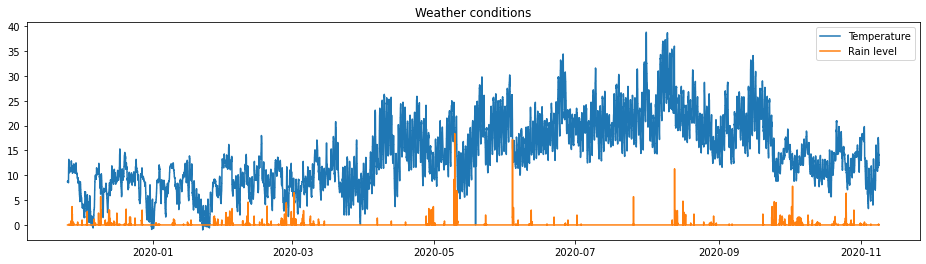

In [64]:
plt.figure(figsize=(16,4))
plt.plot(X_cleaned['timestamp'],X_cleaned['temperature'], label="Temperature")
plt.plot(X_cleaned['timestamp'],X_cleaned['rain_level'], label="Rain level")
plt.legend()
plt.title('Weather conditions')
plt.show()

In [65]:
df_merged_weather = df_merged.merge(X_cleaned, on='timestamp', how="left")
df_merged_weather = df_merged_weather.fillna(method='ffill')
df_merged_weather.head()

timestamp   t_id  nb_available s_id   latitude  longitude  \
0 2019-11-25 00:00:00+00:00  S7-T1             0   S7  48.853445    2.38688   
1 2019-11-25 00:15:00+00:00  S7-T1             0   S7  48.853445    2.38688   
2 2019-11-25 00:30:00+00:00  S7-T1             0   S7  48.853445    2.38688   
3 2019-11-25 00:45:00+00:00  S7-T1             0   S7  48.853445    2.38688   
4 2019-11-25 01:00:00+00:00  S7-T1             0   S7  48.853445    2.38688   

                   street   city  zipcode                        model  hour  \
0  206 Boulevard Voltaire  Paris    75011  E/F, T2, CHAdeMO, T3, Combo     0   
1  206 Boulevard Voltaire  Paris    75011  E/F, T2, CHAdeMO, T3, Combo     0   
2  206 Boulevard Voltaire  Paris    75011  E/F, T2, CHAdeMO, T3, Combo     0   
3  206 Boulevard Voltaire  Paris    75011  E/F, T2, CHAdeMO, T3, Combo     0   
4  206 Boulevard Voltaire  Paris    75011  E/F, T2, CHAdeMO, T3, Combo     1   

   weekday t_type  temperature  wind_speed  wind_gust_speed  rain_level  \
0        0     T1          8.7        11.0             24.0         0.0   
1        0     T1          8.7        11.0             24.0         0.0   
2        0     T1          8.7        11.0             24.0         0.0   
3        0     T1          8.7        11.0             24.0         0.0   
4        0     T1          8.8         9.0             20.0         0.0   

  traffic_state  average_flow  
0         Fluid         218.1  
1         Fluid         218.1  
2         Fluid         218.1  
3         Fluid         218.1  
4         Fluid         144.3

In [66]:
df_merged_weather_all = df_merged_weather.groupby('timestamp').agg({
                                'nb_available':'sum',
                                'temperature':'first',
                                'rain_level':'first',
                                'average_flow':'first'})\
                                .reset_index()

In [67]:
df_merged_weather_all.head()

timestamp  nb_available  temperature  rain_level  \
0 2019-11-25 00:00:00+00:00           122          8.7         0.0   
1 2019-11-25 00:15:00+00:00           126          8.7         0.0   
2 2019-11-25 00:30:00+00:00           127          8.7         0.0   
3 2019-11-25 00:45:00+00:00           123          8.7         0.0   
4 2019-11-25 01:00:00+00:00           119          8.8         0.0   

   average_flow  
0         218.1  
1         218.1  
2         218.1  
3         218.1  
4         144.3

In [68]:
df_merged_weather_all_day = df_merged_weather_all.set_index('timestamp').resample('D', level=0).agg({
        'nb_available':'mean',
        'temperature':'mean',
        'rain_level':'sum',
        'average_flow':'mean'
}).reset_index()

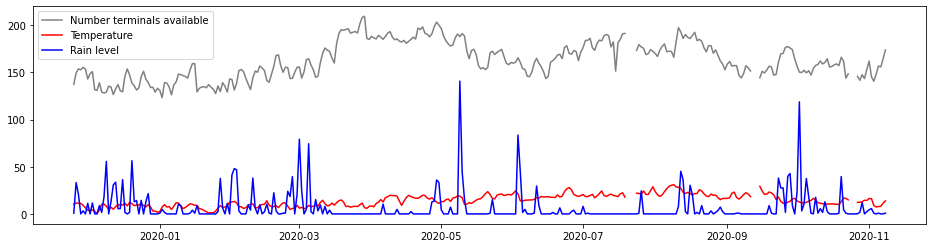

In [69]:
plt.figure(figsize=(16,4))
plt.plot(df_merged_weather_all_day['timestamp'],df_merged_weather_all_day['nb_available'], color='grey', label='Number terminals available')
plt.plot(df_merged_weather_all_day['timestamp'],df_merged_weather_all_day['temperature'], color='r', label='Temperature')
plt.plot(df_merged_weather_all_day['timestamp'],df_merged_weather_all_day['rain_level'], color='b', label='Rain level')
plt.legend()
plt.show()

In [70]:
df_merged_weather_all_day[["nb_available","temperature","rain_level"]].corr()

nb_available  temperature  rain_level
nb_available      1.000000     0.486649   -0.073833
temperature       0.486649     1.000000   -0.078224
rain_level       -0.073833    -0.078224    1.000000